In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, datasets
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
import seaborn as sns
import os
import cv2
from tqdm import tqdm

In [11]:
train_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\train"
test_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\test"
CATEGORIES = ["femaleeyes", "maleeyes"]

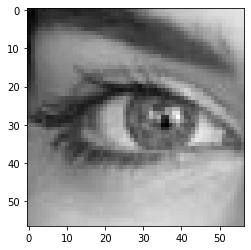

In [12]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(train_path,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [10]:
#import splitfolders
#indata = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\dataset"
#outdata = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data"
#splitfolders.ratio(indata, output=outdata, seed=1337, ratio=(.8, 0.2))

Copying files: 11525 files [04:56, 38.88 files/s] 


In [13]:
print(img_array.shape)

(57, 57)


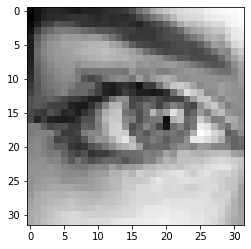

In [14]:
IMG_SIZE = 32

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [16]:
def create_data(DATADIR):
    image_dir = Path(DATADIR)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    images = []
    flat_data = []
    target = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, (IMG_SIZE,IMG_SIZE), anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                target=target,
                images=images)

In [41]:
train_data = create_data(train_path)
test_data = create_data(test_path)

In [18]:
print(len(train_data.data))
print(len(test_data.data))

9219
2306


In [21]:
X_train, X_test, y_train, y_test = train_data.data, test_data.data, train_data.target, test_data.target

In [22]:
svm_classifier = svm.SVC(kernel='poly', degree=3, C=1)
svm_classifier.fit(X_train, y_train)

In [23]:
svm_classifier.score(X_test,y_test)

0.9063313096270599

In [24]:
svm_classifier.score(X_train,y_train)

0.9725566764291138

In [26]:
#Predict the response for test dataset
y_pred = svm_classifier.predict(X_test)
print(y_test[0:5])
print(y_pred[0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [27]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))

Accuracy: 0.9063313096270599
Precision: 0.9088518342802702


In [37]:
# Model Recall: what percentage of positive tuples are labelled as such?
recall_average = recall_score(y_test,y_pred, average="micro")
print("Recall:",recall_average)

Recall: 0.9063313096270599


In [38]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 898,  143],
       [  73, 1192]], dtype=int64)

<AxesSubplot:>

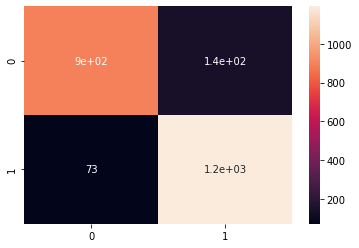

In [39]:
sns.heatmap(conf_matrix, annot=True)

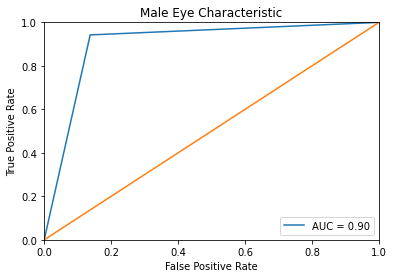

In [40]:
#roc_auc_score

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('Male Eye Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()